In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
# ! means we're executing a shell command
# $data is the way in Jupyter notbook to refer to data in this shell command
!wget $data -O hw02-housing.csv

--2023-09-22 22:45:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘hw02-housing.csv’

hw02-housing.csv    100%[===================>]   1,36M  6,12MB/s    in 0,2s    

2023-09-22 22:45:52 (6,12 MB/s) - ‘hw02-housing.csv’ saved [1423529/1423529]



In [14]:
df = pd.read_csv('hw02-housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [5]:
# Make data consistent
#df.columns = df.columns.str.lower().str.replace(' ', '_')

#categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

#for c in categorical_columns:
#    df[c] = df[c].str.lower().str.replace(' ', '_')

#df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [26]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# this line is needed to display the plots in notebooks
%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

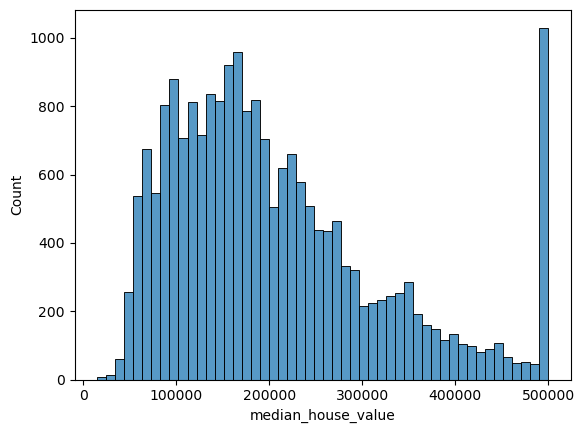

In [17]:
sns.histplot(df.median_house_value, bins=50)

In [20]:
# Keep only the records where ocean_proximity is either '<1h ocean' or 'inland'
df.ocean_proximity == '<1H OCEAN'

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: ocean_proximity, Length: 20640, dtype: bool

In [24]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
# Use only the following columns
numerical = ['latitude','longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
             'households', 'median_income', 'median_house_value']

In [30]:
df_reduced = df[numerical]
df_reduced

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [31]:
# Question 1: There's one feature with missing values. What is it?
df_reduced.isnull().sum()
# Answer: total_bedrooms

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [32]:
# Question 2: What's the median (50% percentile) for variable 'population'?
df_reduced.population.describe()
# Answer: 1195

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [39]:
# Shuffle the dataset (use seed 42)
n = len(df_reduced)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# Split data in train/val/test 60-20-20
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
#n_val, n_test, n_train

df_train = df_reduced.iloc[:n_train]
df_val = df_reduced.iloc[n_train:n_train + n_val]
df_test = df_reduced.iloc[n_train + n_val:]

# Apply the log transformation to median_house_value using np.log1p()
np.log1p(df_train.median_house_value)

701      12.973866
830      12.287657
859      12.419574
860      12.554971
861      12.287196
           ...    
11480    12.472280
11481    12.379189
11482    12.432814
11483    12.744905
11484    12.305017
Name: median_house_value, Length: 9413, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
# random_state=1 to make sure that the results are reproducible
df_full_train, df_test = train_test_split(df_reduced, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

# to reset the shuffled index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Apply the log transformation to median_house_value using np.log1p()
#np.log1p(df_train.median_house_value)
df_train['median_house_value'] = np.log1p(df_train.median_house_value)
df_val['median_house_value'] = np.log1p(df_val.median_house_value)
df_test['median_house_value'] = np.log1p(df_test.median_house_value)
df_full_train['median_house_value'] = np.log1p(df_full_train.median_house_value)

# Now we need to get our y variables
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values
y_full_train = df_full_train.median_house_value.values

# deleting median_house_value from dataframes
# remember we're doing this to avoid accidentially using this variable when building a model
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value'] 
del df_full_train['median_house_value']

In [108]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        107
population              0
households              0
median_income           0
dtype: int64

In [75]:
# We need to deal with missing values of (total_bedrooms)
# Two options fill with 0 or fill with mean
# Try both options
df_train_case0 = df_train
df_train_case0['total_bedrooms'] = df_train_case0['total_bedrooms'].fillna(0)
#df_train_case0['total_bedrooms'].isnull().sum()
df_val_case0 = df_val
df_val_case0['total_bedrooms'] = df_val_case0['total_bedrooms'].fillna(0)

df_train_case_mean = df_train
mean_value=df_train_case_mean['total_bedrooms'].mean()
df_train_case_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)
df_train_case_mean['total_bedrooms'].isnull().sum()
df_val_case_mean = df_val
df_val_case_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

numerical = ['latitude','longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
             'households', 'median_income']

train_dicts_case0 = df_train_case0[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_case0 = dv.fit_transform(train_dicts_case0)
model_case0 = LinearRegression()
model_case0.fit(X_train_case0, y_train)
y_pred = model_case0.predict(X_train_case0)
y_pred

array([12.2259548 , 12.37825735, 11.51962057, ..., 12.02650555,
       12.24276732, 12.32530561])

In [77]:
train_dicts = df_train_case_mean[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_case_mean = dv.fit_transform(train_dicts)
model_case_mean = LinearRegression()
model_case_mean.fit(X_train_case_mean, y_train)
y_pred = model_case_mean.predict(X_train_case_mean)
y_pred

array([12.2259548 , 12.37825735, 11.51962057, ..., 12.02650555,
       12.24276732, 12.32530561])

In [66]:
from sklearn.metrics import mean_squared_error

In [78]:
val_dicts = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred_case0 = model_case0.predict(X_val)
score_case0 = mean_squared_error(y_val, y_pred_case0, squared=False)
y_pred_case_mean = model_case_mean.predict(X_val)
score_case_mean = mean_squared_error(y_val, y_pred_case_mean, squared=False)
round(score_case0, 2), round(score_case_mean, 2)

(0.34, 0.34)

In [96]:
# We need to deal with missing values of (total_bedrooms)
# Two options fill with 0 or fill with mean
# Try both options
# idea here: same way of preparing the dataset regardless of whether it's train, validation or test

def prepare_X_0(df):
    df_num = df[numerical]
    df_num = df_num['total_bedrooms'].fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df[numerical]
    df_num = df_num['total_bedrooms'].fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [120]:
# Question 3: Which option gives a better RMSE?

#df_train_case0['total_bedrooms'].isnull().sum()

base = ['latitude','longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
             'households', 'median_income']


X_train_case0 = df_train[base].fillna(0).values
#X_train_case0 
w0, w = train_linear_regression(X_train_case0, y_train)
#w0, w 
X_val_case0 = df_val[base].fillna(0).values
#X_val_case0
y_pred = w0 + X_val_case0.dot(w)
#y_pred
round(rmse(y_val, y_pred), 2)
# Output: 0.34

df_train_case_mean = df_train
#df_train_case_mean['total_bedrooms'].describe()
mean_value=df_train_case_mean['total_bedrooms'].mean()
df_train_case_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)
X_train_case_mean = df_train_case_mean.values
w0, w = train_linear_regression(X_train_case_mean, y_train)
df_val_case_mean = df_val
df_val_case_mean['total_bedrooms'].fillna(value=mean_value, inplace=True)
X_val_case_mean = df_val_case_mean.values
y_pred = w0 + X_val_case_mean.dot(w)
round(rmse(y_val, y_pred), 2)
# Output: 0.33

# Answer: With mean

0.33

In [123]:
# Question 4
# Which r gives the best RMSE?
# If there are multiple options, select the smallest r.

X_train_case0 = df_train[base].fillna(0).values

for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = X_train_case0
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val_case0 = df_val[base].fillna(0).values
    y_pred = w0 + X_val_case0.dot(w)

    score = round(rmse(y_val, y_pred), 2)
    
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)
    
# Answer: 0

reg parameter:  0.0 bias term:  -10.309523036841556 rmse:  0.33
reg parameter:  1e-06 bias term:  -10.309501622181594 rmse:  0.33
reg parameter:  0.0001 bias term:  -10.307381931571356 rmse:  0.33
reg parameter:  0.001 bias term:  -10.288151913705551 rmse:  0.33
reg parameter:  0.01 bias term:  -10.09972476274513 rmse:  0.33
reg parameter:  0.1 bias term:  -8.536223741268447 rmse:  0.33
reg parameter:  1 bias term:  -3.3488522609768245 rmse:  0.34
reg parameter:  5 bias term:  -0.9029113604826156 rmse:  0.34
reg parameter:  10 bias term:  -0.47075052273000245 rmse:  0.34


In [144]:
# Question 5:
base = ['latitude','longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
             'households', 'median_income']
r_state = [0,1,2,3,4,5,6,7,8,9]

for i in r_state:
    df_full_train, df_test = train_test_split(df_reduced, test_size=0.2, random_state=i)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=i)

    # to reset the shuffled index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Apply the log transformation to median_house_value using np.log1p()
    df_train['median_house_value'] = np.log1p(df_train.median_house_value)
    df_val['median_house_value'] = np.log1p(df_val.median_house_value)
    df_test['median_house_value'] = np.log1p(df_test.median_house_value)
    df_full_train['median_house_value'] = np.log1p(df_full_train.median_house_value)
    
    # Now we need to get our y variables
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values
    y_full_train = df_full_train.median_house_value.values
    
    # deleting median_house_value from dataframes
    # remember we're doing this to avoid accidentially using this variable when building a model
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value'] 
    del df_full_train['median_house_value']
    
    X_train_case0 = df_train[base].fillna(0).values
    X_val_case0 = df_val[base].fillna(0).values
    
    w0, w = train_linear_regression(X_train_case0, y_train)
    
    y_pred = w0 + X_val_case0.dot(w)
    
    score = round(rmse(y_val, y_pred),2)
    
    print("random seed: ",i, "rmse: ",score)

random seed:  0 rmse:  0.33
random seed:  1 rmse:  0.34
random seed:  2 rmse:  0.33
random seed:  3 rmse:  0.34
random seed:  4 rmse:  0.33
random seed:  5 rmse:  0.34
random seed:  6 rmse:  0.34
random seed:  7 rmse:  0.34
random seed:  8 rmse:  0.34
random seed:  9 rmse:  0.35


In [149]:
scores = [0.33, 0.34, 0.33, 0.34, 0.33, 0.34, 0.34, 0.34, 0.34, 0.35]
std = np.std(scores)
round(std, 3)
# Answer: 0.06 ... the closest value is 0.005

0.006

In [152]:
# Question 6:
base = ['latitude','longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
             'households', 'median_income']

df_full_train, df_test = train_test_split(df_reduced, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

# to reset the shuffled index
df_full_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Apply the log transformation to median_house_value using np.log1p()
df_full_train['median_house_value'] = np.log1p(df_full_train.median_house_value)
df_test['median_house_value'] = np.log1p(df_test.median_house_value)

# Now we need to get our y variables
y_full_train = df_full_train.median_house_value.values
y_test = df_test.median_house_value.values

# deleting median_house_value from dataframes
# remember we're doing this to avoid accidentially using this variable when building a model
del df_full_train['median_house_value']
del df_test['median_house_value'] 
    
X_full_train_case0 = df_full_train[base].fillna(0).values
X_test_case0 = df_test[base].fillna(0).values

w0, w = train_linear_regression_reg(X_full_train_case0, y_full_train, r=0.001)

y_pred = w0 + X_test_case0.dot(w)
    
round(rmse(y_test, y_pred),2)

0.35

In [ ]:
# Answer 0.35 ... the closest value is 0.33